# 4. 3 Using SVM to predict CIRI scores

In [4]:
data_df = pd.read_csv('../data/Custom_State_Dep_Reports/CIRI_Text_1999_2009.csv')


In [1179]:
CIRI_Labels_Predict = ['PHYSINT', 'DISAP','KILL', 'POLPRIS', 'TORT', 'OLD_EMPINX', 'NEW_EMPINX', 'ASSN', 'FORMOV','DOMMOV', 'OLD_MOVE', 'SPEECH', 'ELECSD', 'OLD_RELFRE', 'NEW_RELFRE','WORKER', 'WECON', 'WOPOL', 'WOSOC', 'INJUD']

df_model_perform = pd.DataFrame(columns =['Class','y_test','y_pred'])




for C_label in CIRI_Labels_Predict:
    
    print('V2 Analysing: ' + str(C_label))
    

    df_code_perform = pd.DataFrame(columns =['Class','y_test','y_pred'])

    X_train, X_test, y_train, y_test= get_data(C_label)
    print('   Fitting model')
    sgd_tfidf.fit(X_train, y_train)
    y_pred = sgd_tfidf.predict(X_test)
    print('   Accuracy: %s' % accuracy_score(y_pred, y_test))
    
    df_code_perform['y_test'] =  y_test
    df_code_perform['y_pred'] = y_pred
    df_code_perform['Class'] = str(C_label)
    df_model_perform = df_model_perform.append(df_code_perform)

V2 Analysing: PHYSINT
   Extracting Data
   Fitting model
   Accuracy: 0.5219683655536028
V2 Analysing: DISAP
   Extracting Data
   Fitting model
   Accuracy: 0.8787346221441125
V2 Analysing: KILL
   Extracting Data
   Fitting model
   Accuracy: 0.7631578947368421
V2 Analysing: POLPRIS
   Extracting Data
   Fitting model
   Accuracy: 0.8087719298245614
V2 Analysing: TORT
   Extracting Data
   Fitting model
   Accuracy: 0.8052631578947368
V2 Analysing: OLD_EMPINX
   Extracting Data
   Fitting model
   Accuracy: 0.5384615384615384
V2 Analysing: NEW_EMPINX
   Extracting Data
   Fitting model
   Accuracy: 0.39824561403508774
V2 Analysing: ASSN
   Extracting Data
   Fitting model
   Accuracy: 0.7929824561403509
V2 Analysing: FORMOV
   Extracting Data
   Fitting model
   Accuracy: 0.8712374581939799
V2 Analysing: DOMMOV
   Extracting Data
   Fitting model
   Accuracy: 0.8729096989966555
V2 Analysing: OLD_MOVE
   Extracting Data
   Fitting model
   Accuracy: 0.9112709832134293
V2 Analysing: S

In [1183]:
df_model_perform.to_csv('model_performance_report.csv')

[Text(0, 0, 'PHYSINT'),
 Text(0, 0, 'DISAP'),
 Text(0, 0, 'KILL'),
 Text(0, 0, 'POLPRIS'),
 Text(0, 0, 'TORT'),
 Text(0, 0, 'OLD_EMPINX'),
 Text(0, 0, 'NEW_EMPINX'),
 Text(0, 0, 'ASSN'),
 Text(0, 0, 'FORMOV'),
 Text(0, 0, 'DOMMOV'),
 Text(0, 0, 'OLD_MOVE'),
 Text(0, 0, 'SPEECH'),
 Text(0, 0, 'ELECSD'),
 Text(0, 0, 'OLD_RELFRE'),
 Text(0, 0, 'NEW_RELFRE'),
 Text(0, 0, 'WORKER'),
 Text(0, 0, 'WECON'),
 Text(0, 0, 'WOPOL'),
 Text(0, 0, 'WOSOC'),
 Text(0, 0, 'INJUD')]

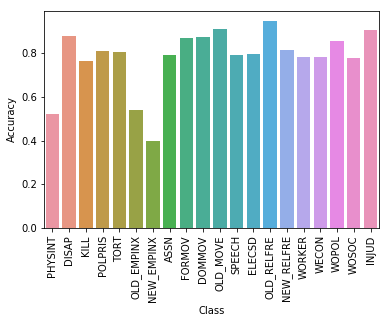

In [1240]:
from seaborn import barplot

performance = generate_performance_db(df_model_perform)

results = barplot(x=performance['Class'],y=performance['Accuracy'])
results.set_xticklabels(results.get_xticklabels(), rotation=90)

In [1146]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))




accuracy 0.7929824561403509
              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78       127
         1.0       0.65      0.75      0.70       172
         2.0       0.89      0.84      0.86       271

   micro avg       0.79      0.79      0.79       570
   macro avg       0.79      0.78      0.78       570
weighted avg       0.80      0.79      0.80       570

[[ 95  31   1]
 [ 15 129  28]
 [  6  37 228]]


### Plot performance matrix for PHYSINT



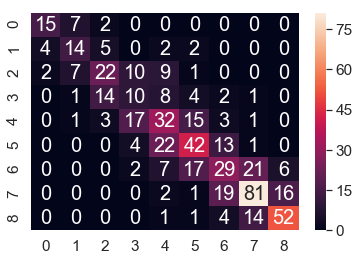

In [1252]:
import seaborn as sn
df= df_model_perform[df_model_perform['Class']=='PHYSINT']
array = confusion_matrix(df['y_test'],df['y_pred'])
df_cm = pd.DataFrame(array, range(9),
                  range(9))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20})# font size





# Extracting feature importance from SGD

In [110]:

def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_[0].ravel()  # I think you need to index for each class within the lable
    
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    #print('Top Positive Coefficients: ' + str(top_positive_coefficients))
    
    top_negative_coefficients = np.argsort(coef)[:top_features]
    #print('Top Negative Coefficients: ' + str(top_negative_coefficients))
    
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]] 
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    #print('Feature Names: ' + str(feature_names))
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    

def fit_model_report_features(pipe):
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    feature_names = pipe.named_steps['vect'].get_feature_names()
    model = pipe.named_steps['model']

    plot_coefficients(model, feature_names)
    print('   Accuracy: %s' % accuracy_score(y_pred, y_test))
    

## Using and example of free speech indicator

In [ ]:
X_train, X_test, y_train, y_test= get_data('SPEECH',1999,2009, False)

#### Basic SVM

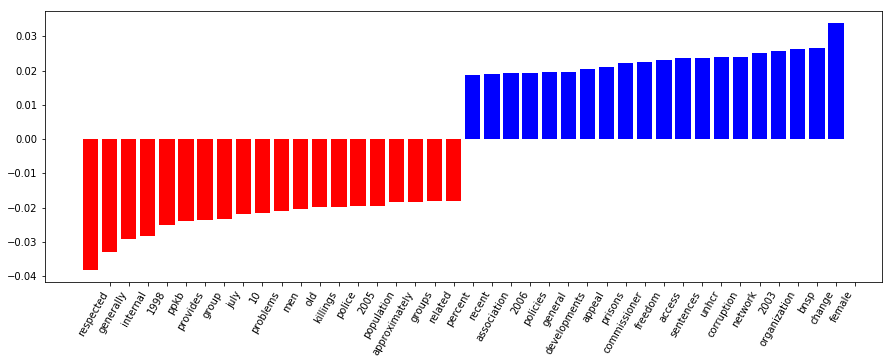

   Accuracy: 0.7771929824561403


In [115]:
fit_model_report_features(svm)

#### SVM with ngrams

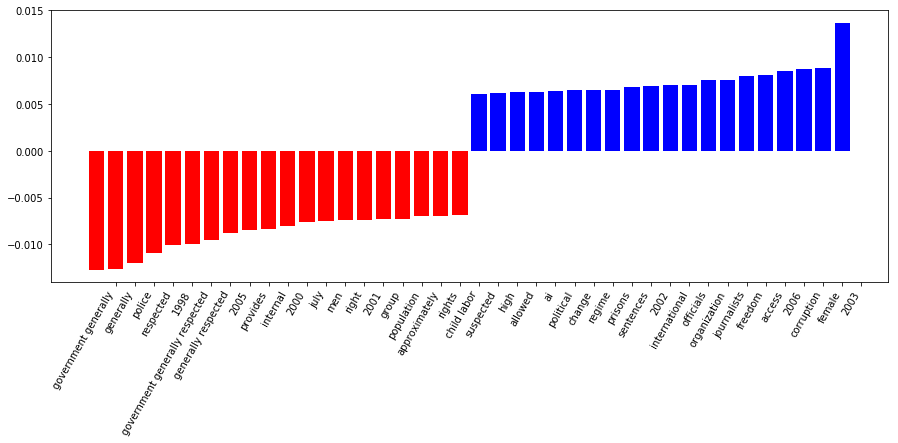

   Accuracy: 0.7912280701754386


In [118]:
fit_model_report_features(svm_ngrams)

#### SVM with ngrams and tfidf

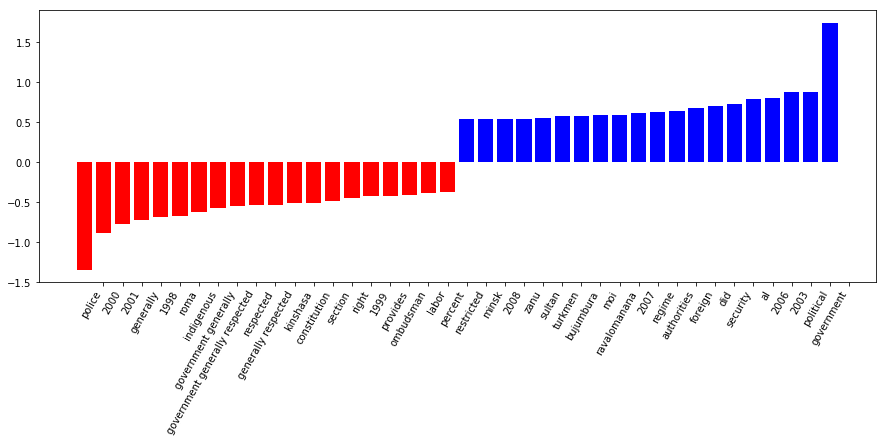

   Accuracy: 0.7964912280701755


In [119]:
fit_model_report_features(svm_ngrams_tfidf)

#### SGD no ngrams or tf idf

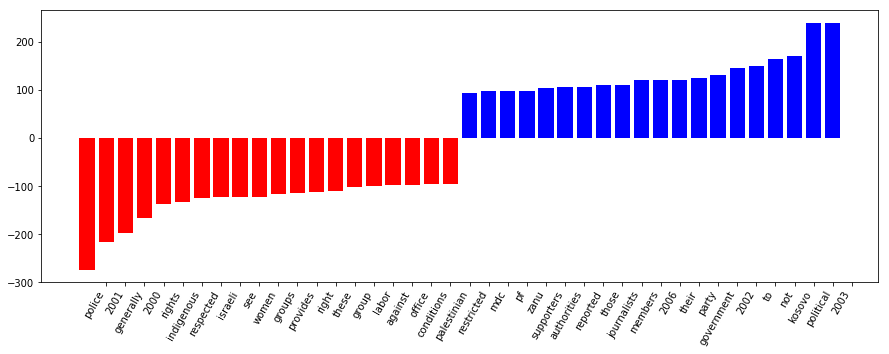

   Accuracy: 0.7666666666666667


In [116]:
fit_model_report_features(sgd)


In [106]:
feature_names

['00',
 '00 00',
 '00 00 authorities',
 '00 00 balboa',
 '00 00 balboas',
 '00 00 bring',
 '00 00 day',
 '00 00 desire',
 '00 00 employers',
 '00 00 hour',
 '00 00 joint',
 '00 00 labor',
 '00 00 ministry',
 '00 00 order',
 '00 00 persons',
 '00 00 routinely',
 '00 00 sbli',
 '00 00 section',
 '00 00 security',
 '00 00 written',
 '00 000',
 '00 000 00',
 '00 000 amd',
 '00 000 cfa',
 '00 000 drams',
 '00 000 huf',
 '00 000 naira',
 '00 000 rubles',
 '00 000 shillings',
 '00 050',
 '00 050 cedis',
 '00 10',
 '00 10 00',
 '00 12',
 '00 12 30',
 '00 12 500',
 '00 130',
 '00 130 pesos',
 '00 132',
 '00 132 000',
 '00 17',
 '00 17 lempiras',
 '00 18',
 '00 18 65',
 '00 20',
 '00 20 000',
 '00 200',
 '00 200 000',
 '00 2006',
 '00 2006 recent',
 '00 253',
 '00 253 000',
 '00 26',
 '00 26 percent',
 '00 27',
 '00 27 000',
 '00 30',
 '00 30 security',
 '00 300',
 '00 300 dinars',
 '00 300 dirhams',
 '00 31',
 '00 31 200',
 '00 35',
 '00 35 euros',
 '00 370',
 '00 370 new',
 '00 44',
 '00 44 37

In [1296]:
vec= CountVectorizer(strip_accents= 'unicode', stop_words='english',ngram_range=(1,3))
tf_idf = TfidfTransformer()
clf = SGDClassifier(class_weight = 'balanced', loss='hinge', penalty='l2', random_state=42, max_iter=30, tol=None) #alpha=1e-3,

vectorised = vec.fit_transform(data)
vectorised = tf_idf.fit_transform(vectorised)





In [1298]:
clf.fit(vectorised, y_train)

/Users/garethwalker/anaconda3/envs/DataChallenge/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=30,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

Top Positive Coefficients: [ 151520 3228550  329877 3440825  954052 3801351 3221075 5267796 3045455
 3882646  375067 2134383 5947799 5679728  644465  482156 3539475 4359206
 3498458 2492512]
Top Negative Coefficients: [ 115801 1408501 5144408 2459565 5804657  475164 2290375 4121948 4440221
 4654515 2254818 5098776 3035341 5161123 3283574 5147943 2877590 3679120
 4318776 4129320]
Feature Names: ['00' '00 00' '00 00 authorities' ... 'zziwa' 'zziwa arrested'
 'zziwa arrested held']


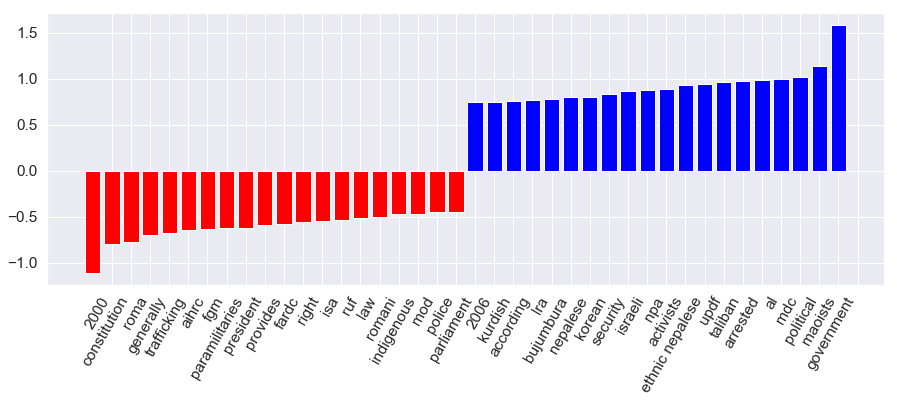

In [1299]:
plot_coefficients(clf, vec.get_feature_names(top_features=20))

looks like location based data is playing too much of a role in analysis

# attempt to remove location variables from corpus

   Extracting Data
Cleaning text
Removing named entities from150 Documents
 Analysing document  151

   Extracting Data
      Removing named entities from1044 Documents
 Analysing document  1045      Cleaning text
Fitting model
Predicting
   Accuracy: 0.7993630573248408
Identifying keywords


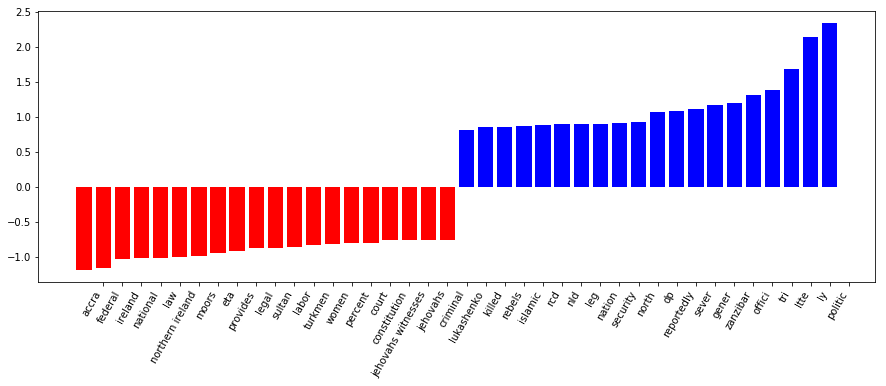

In [52]:

import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(strip_accents= 'unicode', stop_words='english',ngram_range=(1,3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(class_weight = 'balanced', loss='hinge', penalty='l2', random_state=42, max_iter=30, tol=None)), #alpha=1e-3,
               ])

X_train, X_test, y_train, y_test= get_data('POLPRIS',2000,2005)

print('Fitting model')
sgd.fit(X_train, y_train)

print('Predicting')
y_pred = sgd.predict(X_test)


print('   Accuracy: %s' % accuracy_score(y_pred, y_test))

print('Identifying keywords')
plot_coefficients(clf, vec.get_feature_names())





In [41]:
#y_pred = clf.predict(X_test)'


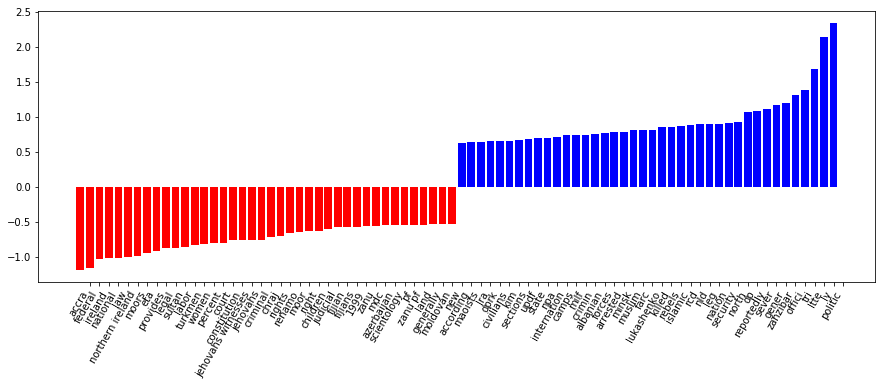

In [65]:
plot_coefficients(clf, vec.get_feature_names(),top_features=40)

In [76]:
data_df['Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])